<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Statistics_For_Astronomers_20231009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
### It is known that the scores of high school students in Edge City on the Final Aptitude Test are distributed according to a Gaussian with mean 100 and standard deviation 12.<br>
### In comparison, the average score of 55 students from the *Zoolander Center for Kids Who Can't Read Good and Who Wanna Learn to Do Other Stuff Good Too* is found to be 103.5.
### Are the students from the Zoolander Center performing better than the average student in Edge City?


---
##### We need to compare the mean score $M$ of the 55 students to the population mean $\mu$ of Edge City's scores, and determine whether the difference between these values is statistically significant.<br>
The standard deviation is given to us, so we can use the $Z$-test. If it was unknown or if the number of students was smaller than $\sim 50$, we would have to use the $t$-test.
<br>
<br>
Since the question specifically asks whether the students at the Zoolander Center perform **better**, we need to determine whether $M$ is significantly greater than $\mu$. This will be a **one-tailed test**.
<br>
<br>
##### The standard deviation of the score for each student in Edge City is 12. <br>
The standard deviation of the mean is then ${\rm SDOM} = \displaystyle{12\over\sqrt{55}}\approx 1.62$.<br>
The difference between $M$ and $\mu$ must be compared to this standard deviation.
<br>
<br>
$Z_{\rm obs} \equiv \displaystyle{M-\mu\over {\rm SDOM}} \approx 2.16$<br>

That is, $M$ is more than 2 standard deviations away from $\mu$. The $Z$-score corresponding to this is $P(Z > Z_{\rm obs})=1-{\rm CDF}(Z_{\rm obs})=1-{\rm CDF}(3.27)\approx 1.5\%$, smaller than the typical threshold 0.05 for hypothesis testing. Therefore, the students of the Zoolander Center are performing better than the average Edge City student.



In [ ]:
from scipy.stats import norm
import numpy as np
mu, sigma, N, M = 100, 12, 55, 103.5
SDOM = sigma / np.sqrt(N)
print(SDOM)
Z_obs = (M-mu)/SDOM
print(Z_obs)
print(1 - norm.cdf(Z_obs))

1.618079669911781
2.1630578920695682
0.01526836361108308


In their article, [*Investigating Mass Segregation of the Binary Stars in the Open Cluster NGC 6819*](https://ui.adsabs.harvard.edu/abs/2023arXiv230815582Z/abstract), Zwicker et al. argue that the fraction of binary stars with mass ratio $>0.5$ evolves as a function of distance from the centre of the cluster. They demonstrate this by comparing the mean binary fraction of the innermost and outermost bins in their Figure 2:<br><br><br>
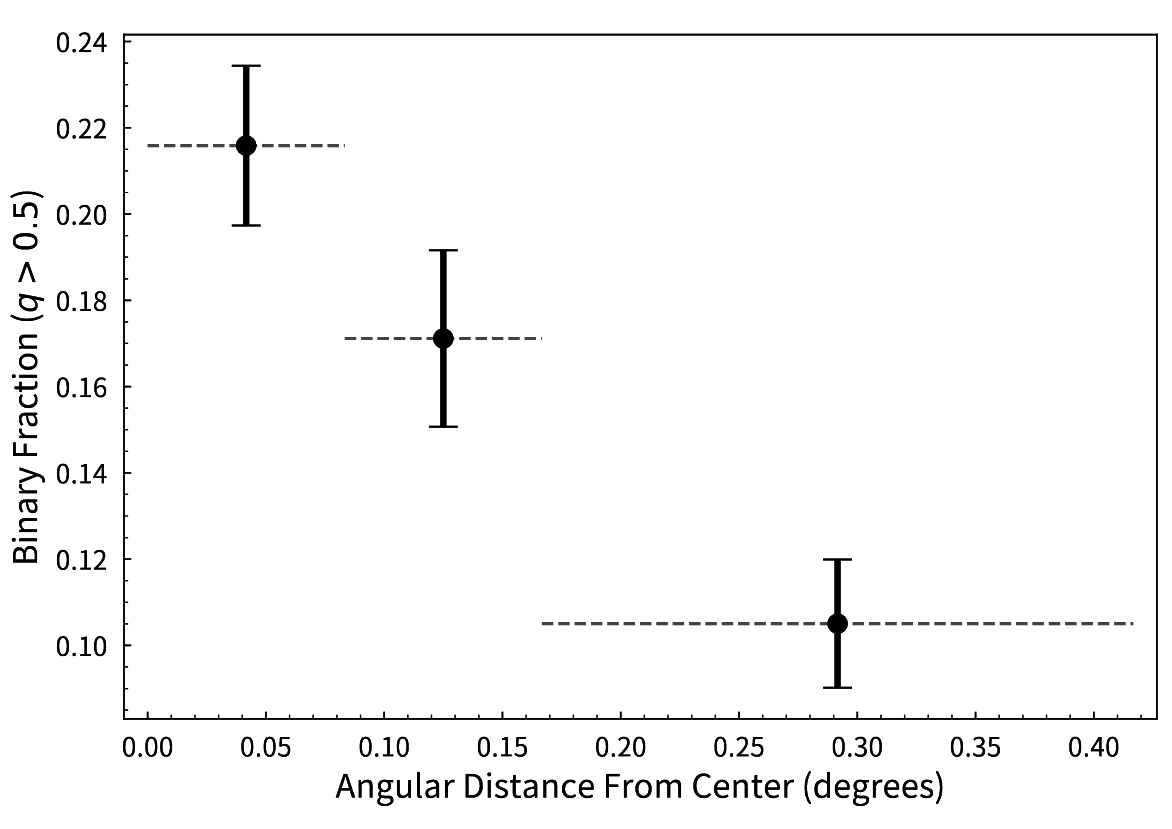

<br><br><br>
They say that both bins have identical numbers of binary stars, but do not provide this number. They then say:<br>
>> "a two-sided $Z$-test between the first and third bins returns a significant distinction, with a $p$-value of $1.06\times 10^{-5}$"


From the values in the figure, assuming their $p$-value was computed correctly, determine the approximate number of stars in each bin.

##### We are comparing the means of two sub-populations, each with their own standard deviations. We don't know the number of points per bin, but since the authors used a $Z$-test we will assume there are more than 50 per bin.<br>

##### To compute the observed $Z$-score, we will need to (a) compute the standard deviations of the means as before, and (b) combine these in quadrature.<br>

##### ${\rm SDOM_1} = \displaystyle{\sigma_1\over\sqrt{N}}$, and ${\rm SDOM_2} = \displaystyle{\sigma_2\over\sqrt{N}}$, with $N$ to be found.<br>

##### The order of the difference between means doesn't matter, as we're performing a two-tailed test:<br>
##### $Z_{\rm obs} = \displaystyle{\mu_1 - \mu_2\over \sqrt{{\rm SDOM_1}^2 + {\rm SDOM_2}^2}} \approx 0.103\sqrt{N}$<br><br>

##### Digitise the image to obtain numerical values for the mean and standard deviation of each bin.<br>
> means = [0.216 0.172 0.105], standard deviations = [0.334 0.2665 0.16515]<br><br>

##### The authors found $P(|Z| \geq Z_{\rm obs})\approx 1.06\times 10^{-5}$, or $P(Z \geq Z_{\rm obs})\approx 5.3\times 10^{-6}$.<br>
This means $Z\approx \texttt{np.abs(scipy.stats.norm.ppf(}5.3\times 10^{-6}\texttt{))}=4.40$<br><br>

##### Solving for $N$, we find $N=(Z/Z_{\rm obs})^2\approx 1930$.

